In [45]:
!pip install opencv-python wget matplotlib
#!apt update && apt install -y libsm6 libxext6 libgtk2.0-dev

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


category : bird


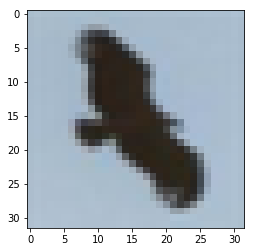

In [64]:
import numpy as np
import cv2
import cPickle
import matplotlib.pyplot as plt


def extractImagesAndLabels(path, file):
    f = open(path+file, 'rb')
    dict = cPickle.load(f)
    images = dict['data']
    images = np.reshape(images, (10000, 3, 32, 32))
    labels = dict['labels']
    return images, labels

def extractCategories(path, file):
    f = open(path+file, 'rb')
    dict = cPickle.load(f)
    return dict['label_names']

def saveCifarImage(array, path, file):
    # array is 3x32x32. cv2 needs 32x32x3
    array = array.asnumpy().transpose(1,2,0)
    # array is RGB. cv2 needs BGR
    array = cv2.cvtColor(array, cv2.COLOR_RGB2BGR)
    # save to PNG file
    return cv2.imwrite(path+file+".png", array)

images, labels = extractImagesAndLabels("../data/CIFAR-10/cifar-10-batches-py/", "test_batch")
categories = extractCategories("../data/CIFAR-10/cifar-10-batches-py/", "batches.meta")

def getImage(images, id):
    image = images[id]
    image = image.transpose([1, 2, 0])
    image = image.astype('float32')
    image /= 255
    return image

imgid=160
image = getImage(images, imgid)
%matplotlib inline
imgplot = plt.imshow(image)

labelid = labels[imgid]
category = categories[labelid]
print("category : "+category)

#ret=saveCifarImage(imgarray[imgid], "../data/CIFAR-10/", "image"+(str)(imgid))

In [65]:
from __future__ import print_function
import numpy as np
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Input, MaxPooling2D
from keras.layers import Conv2D

num_classes = 10

inputs = Input(shape=(32, 32, 3))

## ----------- Inception --------- 

tower_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(inputs)
tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu', name='t1_conv')(tower_1)

tower_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(inputs)
tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(inputs)
tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

x = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1) 

## ----------- Inception --------- 

x = Conv2D(8, (3, 3))(x)    
x = Activation('relu')(x) 
x = MaxPooling2D(pool_size=(2, 2))(x) 
x = Flatten()(x) 

x = Dense(num_classes)(x) 

output = Activation('softmax')(x)
model = Model([inputs], output)
#model.summary()

model.load_weights("../checkpoints/cifar10-inception-106-0.68.hdf5")
#print(image.shape)
image = np.expand_dims(image, axis=0)
print(image.shape)
#print (categories)
result = model.predict(image)

i=0
while (i < 10):
    print (str(categories[i])+" : "+str(result[0][i]))
    i+=1
           


(1, 32, 32, 3)
airplane : 0.17375696
automobile : 2.284254e-08
bird : 0.4777859
cat : 0.34566244
deer : 0.0017572587
dog : 0.0007596723
frog : 3.7490892e-05
horse : 0.00018700845
ship : 5.256496e-05
truck : 6.281843e-07
